# Part II - Ford GoBike System Presentation
## by Tersoo Adorowa

## Investigation Overview


> In this analysis, I investigate users' features and relate them to trips, which can be used to predict the demand for bikes. The main focus was on the members' age, gender, and type, but the duration of trips, and if bikes were shared for all trips also were explored variables.
 


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobikes = pd.read_csv('./gobikes.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
gobikes = gobikes.drop(columns=['Unnamed: 0'])
gobikes.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,grouped_age,member_age_new
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,30-39,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,40-49,50.0


## Count of Member Gender

> There are more men than women by landslide margin. There is also the 'other' which can be overlooked.


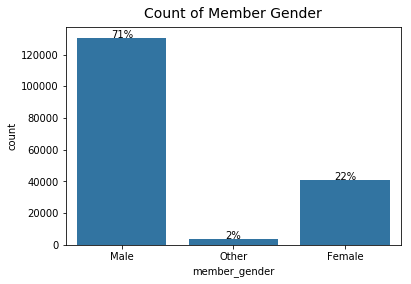

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data = gobikes, x = 'member_gender', color = base_color)

# now add annotations
n_points = gobikes.shape[0]
cat_counts = gobikes['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    plt.title('Count of Member Gender', fontsize=14, y=1.015)

## Member Ages Vs. Member Genders

> Comparing the two variables apparently with more outliers using a scatter graph, people identified as Male and Others have more errors than Female. Interestingly, it seems that only women are careful when entering the birth age and do not make gross mistakes. The gender men and others are said to be older than not just the outlier (60 years old) but also older than the life expectancy in the USA (78 years old).


Text(0.5,1.015,'Member age vs. member gender')

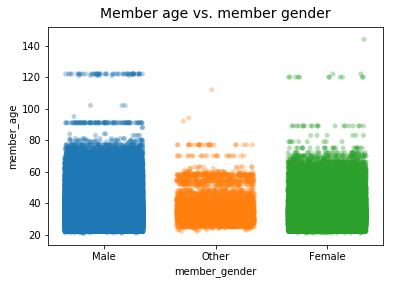

In [6]:
gobikes['member_age'] = gobikes.member_age.astype(float)
# scatterplot (jittered) - age and gender
sb.stripplot(data = gobikes, x = 'member_gender', y = 'member_age',
           jitter = 0.35 , alpha =  1/3);
plt.title('Member age vs. member gender', fontsize=14, y=1.015)

## Analysis of Users

> The graph 1 shows that there are more men than other genders. The graph 2 shows that men are majority in all age groups. In the graphs 3 and 4, men are mojority of the clients. The majority of clients are subscriber.

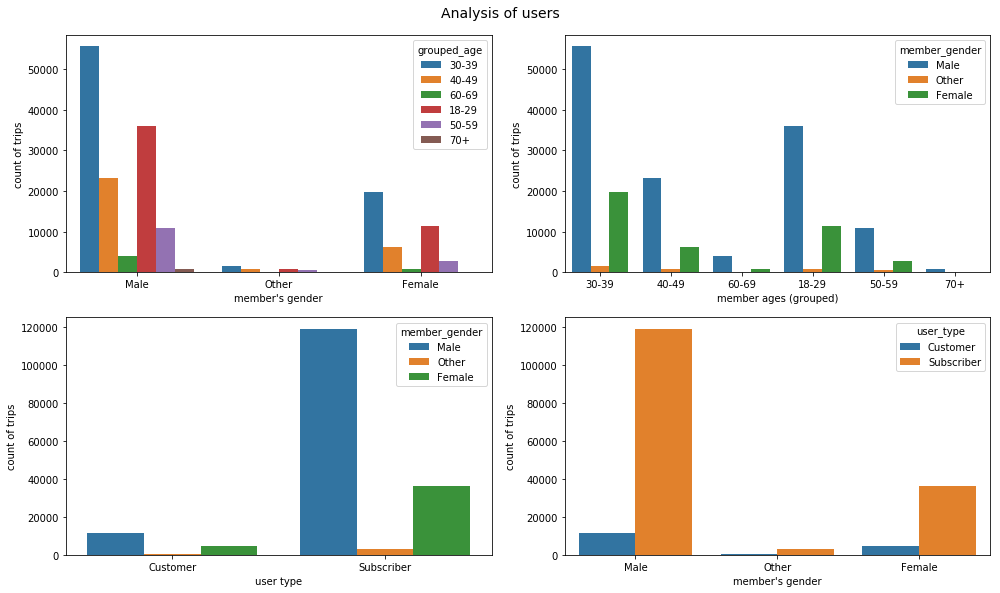

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [14,8])
base_color = sb.color_palette()[0]
plt.suptitle('Analysis of users', fontsize=14, y=1.025)

ax1 = plt.subplot(2,2,1)
ax1=sb.countplot(data = gobikes, x = 'member_gender', hue = 'grouped_age') 
ax1= plt.xlabel("member's gender")
ax1= plt.ylabel('count of trips')

ax2 = plt.subplot(2,2,2)
ax2=sb.countplot(data = gobikes, x = 'grouped_age', hue = 'member_gender')
ax2= plt.xlabel("member ages (grouped)")
ax2= plt.ylabel('count of trips')


ax3 = plt.subplot(2,2,3)
ax3=sb.countplot(data = gobikes, x = 'user_type', hue = 'member_gender') 
ax3= plt.xlabel('user type')
ax3= plt.ylabel('count of trips')

ax4 = plt.subplot(2,2,4)
ax4=sb.countplot(data = gobikes, x = 'member_gender' , hue = 'user_type')
ax4= plt.xlabel("member's gender")
ax4= plt.ylabel('count of trips')

plt.tight_layout()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [8]:
# Use this command if you are running this file in local
jupyter nbconvert Part_II_slide_deck_tersoo.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
